In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Carregar os dados
df = pd.read_csv('dados.csv')

In [4]:
# Preparar os dados
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, dayfirst=True)
df = df.sort_values('Data')

# Selecionar a coluna de fechamento
fechamento = df[['Data', 'Último']].set_index('Data')

C:\Users\athos\AppData\Local\Temp\ipykernel_6904\262999424.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True, dayfirst=True)


In [5]:
# Dividir em treino e teste
treino = fechamento.iloc[:-30].values.flatten()  # Treino
teste = fechamento.iloc[-30:].values.flatten()  # Teste

In [6]:
# Criar janelas para XGBoost
def criar_janelas(series, janela):
    X, y = [], []
    for i in range(janela, len(series)):
        X.append(series[i-janela:i])  # Entrada: janela de dados
        y.append(series[i])  # Saída: próximo valor
    return np.array(X), np.array(y)

# Parâmetros do modelo
janela = 30  # Usar 30 dias anteriores para prever o próximo valor
X_treino, y_treino = criar_janelas(treino, janela)

# Adicionar os últimos valores de treino aos dados de teste
dados_completos = np.concatenate([treino[-janela:], teste])
X_teste, y_teste = criar_janelas(dados_completos, janela)

In [7]:
# Treinar o modelo XGBoost
modelo_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
modelo_xgb.fit(X_treino, y_treino)

# Fazer previsões
previsoes = modelo_xgb.predict(X_teste)

In [8]:
# Avaliar o desempenho
mse = mean_squared_error(y_teste, previsoes)
mape = np.mean(np.abs((y_teste - previsoes) / y_teste)) * 100
acuracia = 100 - mape

print(f'MSE (XGBoost): {mse:.2f}')
print(f'MAPE (XGBoost): {mape:.2f}%')
print(f'Acurácia (XGBoost): {acuracia:.2f}%')

MSE (XGBoost): 2.68
MAPE (XGBoost): 1.05%
Acurácia (XGBoost): 98.95%


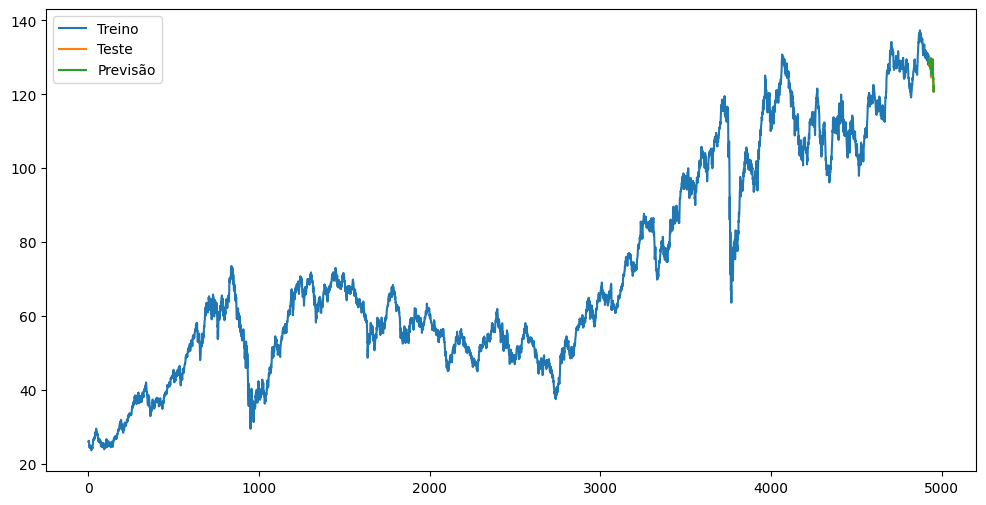

In [9]:
# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(range(len(treino)), treino, label='Treino')
plt.plot(range(len(treino), len(treino) + len(teste)), teste, label='Teste')
plt.plot(range(len(treino), len(treino) + len(teste)), previsoes, label='Previsão')
plt.legend()
plt.show()